In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [2]:
# Read dataset file
df = pd.read_csv('VCB.csv')
df = df[['Price']]
df = df.dropna()
df

,Price
0,43216
1,44960
2,44429
3,44808
4,44505
...,...
1237,91700
1238,92600
1239,92800
1240,95000


In [3]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [4]:
# Normalize the data
mean = train_data.mean()
meant = test_data.mean()
meanv = val_data.mean()
std = train_data.std()
stdt = test_data.std()
stdv = val_data.std()
train_data = (train_data - mean) / std
test_data = (test_data - meant) / stdt
val_data = (val_data - meanv) / stdv

In [5]:
# Prepare the data for CNN
window_size = 10

def create_sequences(data, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data.values, window_size)
X_test, y_test = create_sequences(test_data.values, window_size)
X_val, y_val = create_sequences(val_data.values, window_size)


In [6]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(window_size, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [7]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/100
20/20 [==============================] - 2s 19ms/step - loss: 0.4921 - val_loss: 0.1481
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0574 - val_loss: 0.1102
Epoch 3/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0416 - val_loss: 0.0983
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0355 - val_loss: 0.0903
Epoch 5/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0307 - val_loss: 0.0810
Epoch 6/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0285 - val_loss: 0.0750
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0250 - val_loss: 0.0715
Epoch 8/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0220 - val_loss: 0.0664
Epoch 9/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0197 - val_loss: 0.0627
Epoch 10/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0183 - val_loss: 0.0598
Epoch 11

20/20 [==============================] - 0s 6ms/step - loss: 0.0121 - val_loss: 0.0419
Epoch 84/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0107 - val_loss: 0.0421
Epoch 85/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0108 - val_loss: 0.0418
Epoch 86/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0106 - val_loss: 0.0417
Epoch 87/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0103 - val_loss: 0.0428
Epoch 88/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0106 - val_loss: 0.0415
Epoch 89/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0111 - val_loss: 0.0424
Epoch 90/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0107 - val_loss: 0.0415
Epoch 91/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0102 - val_loss: 0.0411
Epoch 92/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0101 - val_loss: 0.0413
Epoch 93/100


In [8]:
# Make predictions
y_pred = model.predict(X_test)
# Inverse transform the predictions
y_pred = y_pred * pd.Series(stdt).values[0] + pd.Series(meant).values[0]

12/12 [==============================] - 0s 3ms/step


In [9]:
# Make predictions
y_vpred = model.predict(X_val)
# Inverse transform the predictions
y_vpred = y_vpred * pd.Series(stdv).values[0] + pd.Series(meanv).values[0]

8/8 [==============================] - 0s 2ms/step


In [10]:
df

,Price
0,43216
1,44960
2,44429
3,44808
4,44505
...,...
1237,91700
1238,92600
1239,92800
1240,95000


In [11]:
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]
# re make predictions on the testing set
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
# re make predictions on the validate set
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]
# calculate the RMSE
valid_rmse = np.sqrt(np.mean((y_vpred - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# calculate the MAPE
valid_mape = np.mean(np.abs((y_val - y_vpred) / y_val)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Validation MAPE:", valid_mape)
print("Testing MAPE:", test_mape)

# calculate the MAE
valid_mae = np.mean(np.abs(y_vpred - y_val))
test_mae = np.mean(np.abs(y_pred - y_test))
print("Validation MAE:", valid_mae)
print("Testing MAE:", test_mae)

Validation RMSE: 11280.852088425252
Testing RMSE: 6371.97654718109
Validation MAPE: 11.320012878106454
Testing MAPE: 6.133122348319914
Validation MAE: 9127.617787572886
Testing MAE: 4868.125792133569


In [12]:
y_val

array([74400, 75600, 77000, 76700, 77400, 78000, 78900, 80500, 79000,
       77500, 79700, 81000, 79200, 77800, 77700, 76400, 77000, 76500,
       79100, 76100, 76000, 77700, 76000, 75900, 75000, 74900, 76300,
       75500, 74800, 74000, 74100, 74000, 72800, 75500, 74000, 72000,
       71900, 71800, 72400, 72300, 72000, 71300, 72500, 72500, 72500,
       72900, 73900, 75000, 75300, 74700, 77000, 78900, 79500, 82500,
       82000, 82000, 80800, 80500, 81500, 81600, 81800, 81500, 81500,
       81500, 80900, 80000, 80200, 82000, 82000, 82500, 82500, 86000,
       84000, 82600, 82700, 80000, 78000, 78800, 79100, 78600, 78300,
       79200, 80000, 78800, 79200, 78900, 78000, 75900, 75000, 74300,
       75000, 74000, 73200, 70600, 71300, 71500, 70100, 66700, 65100,
       62000, 64000, 66500, 68100, 66300, 67700, 67900, 69200, 68000,
       68000, 69900, 70000, 71700, 71600, 73500, 75000, 73600, 73000,
       71800, 71800, 72600, 74000, 72800, 75500, 75100, 75000, 75100,
       76500, 76500,

In [13]:
y_vpred

array([[77211.61 ],
       [78375.12 ],
       [81099.6  ],
       [79907.47 ],
       [77275.734],
       [77110.98 ],
       [77700.234],
       [77727.31 ],
       [76658.73 ],
       [77861.37 ],
       [77962.81 ],
       [75108.41 ],
       [76308.53 ],
       [77355.28 ],
       [75564.62 ],
       [75033.625],
       [74776.04 ],
       [76208.734],
       [76808.48 ],
       [74425.44 ],
       [73765.12 ],
       [74102.695],
       [74064.26 ],
       [73252.06 ],
       [74398.04 ],
       [74814.125],
       [71453.234],
       [71255.586],
       [72036.78 ],
       [72140.52 ],
       [72605.19 ],
       [71794.52 ],
       [71287.766],
       [72358.73 ],
       [72684.95 ],
       [72053.04 ],
       [72285.42 ],
       [73457.89 ],
       [74435.67 ],
       [75344.6  ],
       [74846.99 ],
       [76175.87 ],
       [78617.234],
       [79352.734],
       [81811.23 ],
       [83160.16 ],
       [82078.35 ],
       [81649.586],
       [80929.4  ],
       [81467.77 ],


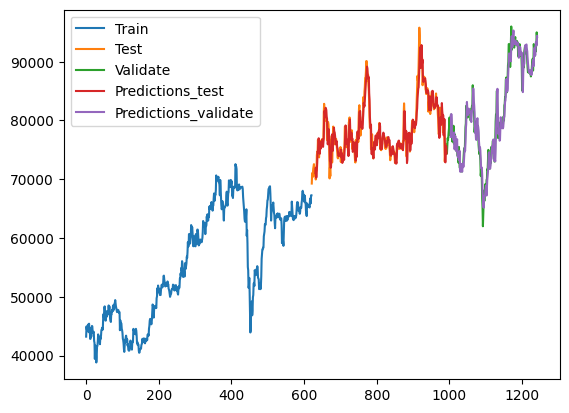

In [14]:
# ploting the actual values and predicted values
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index[-len(y_pred):], y_pred)
plt.plot(val_data.index[-len(y_vpred):], y_vpred)
plt.legend(['Train', 'Test','Validate', 'Predictions_test','Predictions_validate'])
plt.show()

In [15]:
y_val

array([74400, 75600, 77000, 76700, 77400, 78000, 78900, 80500, 79000,
       77500, 79700, 81000, 79200, 77800, 77700, 76400, 77000, 76500,
       79100, 76100, 76000, 77700, 76000, 75900, 75000, 74900, 76300,
       75500, 74800, 74000, 74100, 74000, 72800, 75500, 74000, 72000,
       71900, 71800, 72400, 72300, 72000, 71300, 72500, 72500, 72500,
       72900, 73900, 75000, 75300, 74700, 77000, 78900, 79500, 82500,
       82000, 82000, 80800, 80500, 81500, 81600, 81800, 81500, 81500,
       81500, 80900, 80000, 80200, 82000, 82000, 82500, 82500, 86000,
       84000, 82600, 82700, 80000, 78000, 78800, 79100, 78600, 78300,
       79200, 80000, 78800, 79200, 78900, 78000, 75900, 75000, 74300,
       75000, 74000, 73200, 70600, 71300, 71500, 70100, 66700, 65100,
       62000, 64000, 66500, 68100, 66300, 67700, 67900, 69200, 68000,
       68000, 69900, 70000, 71700, 71600, 73500, 75000, 73600, 73000,
       71800, 71800, 72600, 74000, 72800, 75500, 75100, 75000, 75100,
       76500, 76500,

In [16]:
y_vpred

array([[77211.61 ],
       [78375.12 ],
       [81099.6  ],
       [79907.47 ],
       [77275.734],
       [77110.98 ],
       [77700.234],
       [77727.31 ],
       [76658.73 ],
       [77861.37 ],
       [77962.81 ],
       [75108.41 ],
       [76308.53 ],
       [77355.28 ],
       [75564.62 ],
       [75033.625],
       [74776.04 ],
       [76208.734],
       [76808.48 ],
       [74425.44 ],
       [73765.12 ],
       [74102.695],
       [74064.26 ],
       [73252.06 ],
       [74398.04 ],
       [74814.125],
       [71453.234],
       [71255.586],
       [72036.78 ],
       [72140.52 ],
       [72605.19 ],
       [71794.52 ],
       [71287.766],
       [72358.73 ],
       [72684.95 ],
       [72053.04 ],
       [72285.42 ],
       [73457.89 ],
       [74435.67 ],
       [75344.6  ],
       [74846.99 ],
       [76175.87 ],
       [78617.234],
       [79352.734],
       [81811.23 ],
       [83160.16 ],
       [82078.35 ],
       [81649.586],
       [80929.4  ],
       [81467.77 ],
